<a href="https://colab.research.google.com/github/priyachittamuru/kmeans/blob/main/kmeans_airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#importing neccesary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
#reading the cvs file
df = pd.read_csv('/content/EastWestAirlines.csv')

In [30]:
#printing the first 5 rows of dataset
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [31]:
#finding the datatypes,colums and rows /information of the data provided
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [32]:
#there are 3999 rows ,12 colomns and all datatypes are int so there is no categorial data

In [33]:
#finding the datatypes,colums and rows /information of the data provided
df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [34]:
#we can see diff between 75% and max values is high for balance,qual miles,bonus miles ,bonus trans,flight miles 12mo,
#almost all coloumns so boxplot and histplot is required for further analysis to find skewed data
#balance coloumn has exponential data so convert them using log function

In [35]:
# column for log transformation (numeric and positive)
cols_for_log = ['Balance']


for col in cols_for_log:
    # Add 1 to handle zero values before log transformation
    df[col] = np.log1p(df[col])

In [36]:
#checking the balance column
df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,10.552024,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.275925,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,9.827065,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,10.671232,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,11.433936,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,14.348981,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


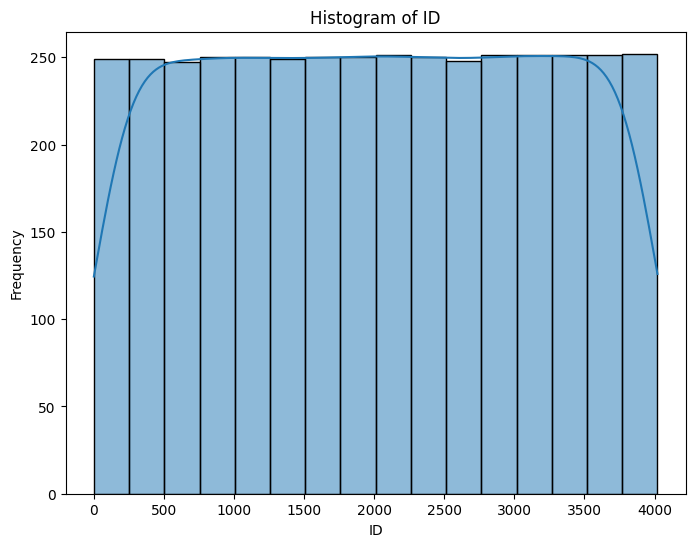

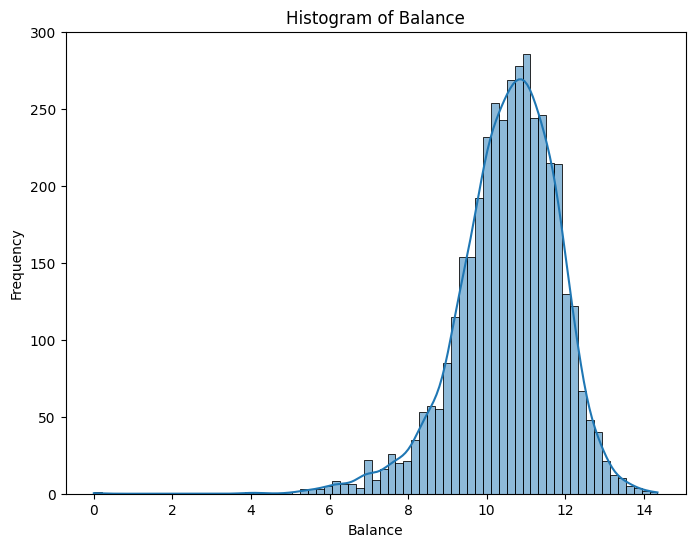

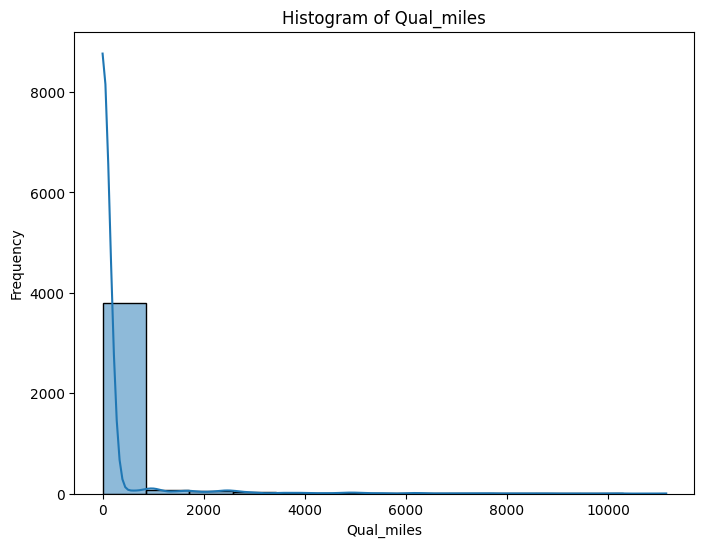

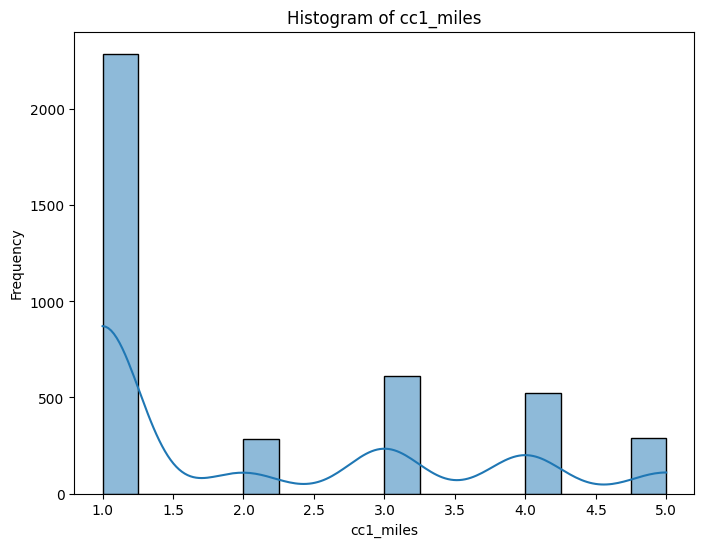

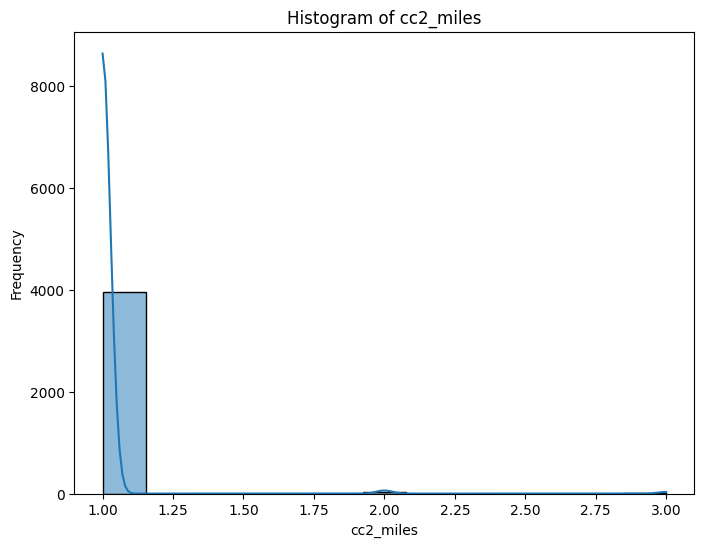

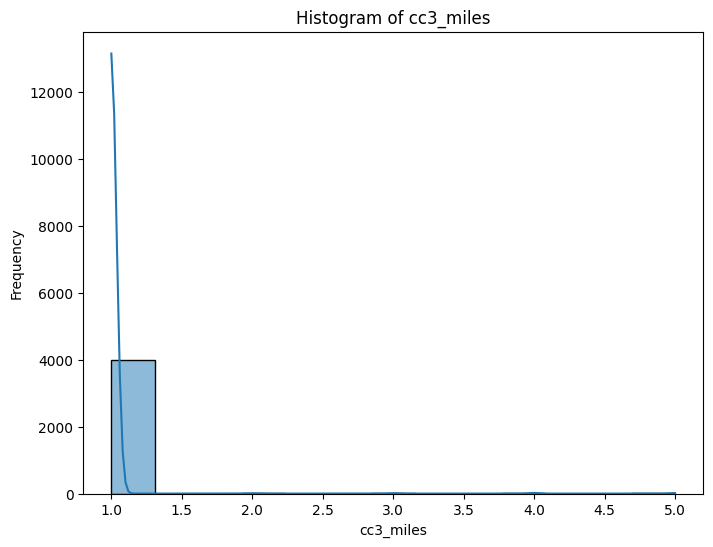

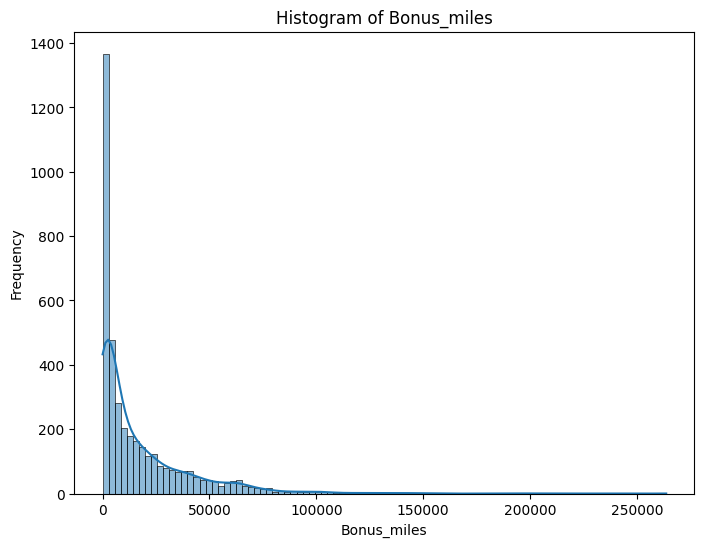

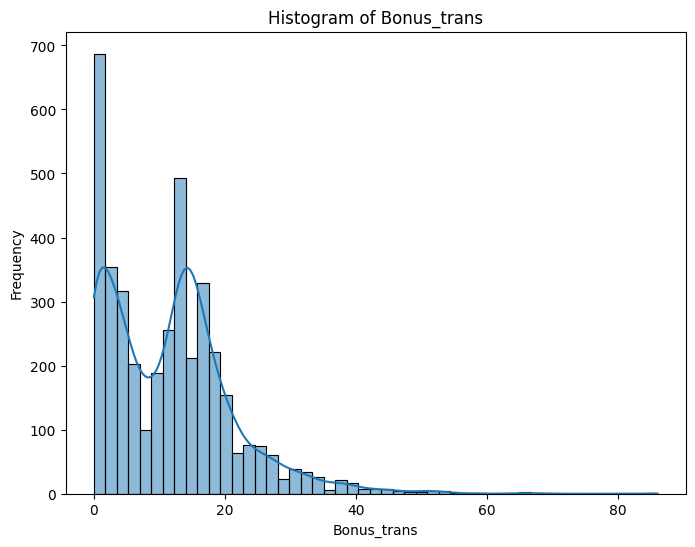

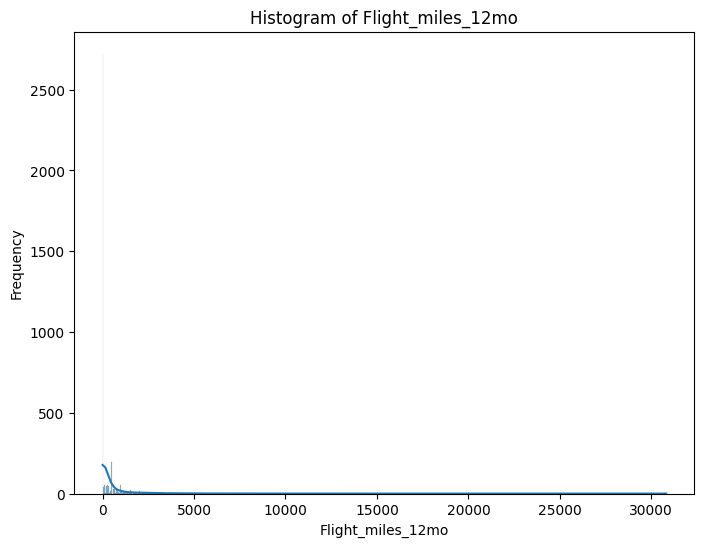

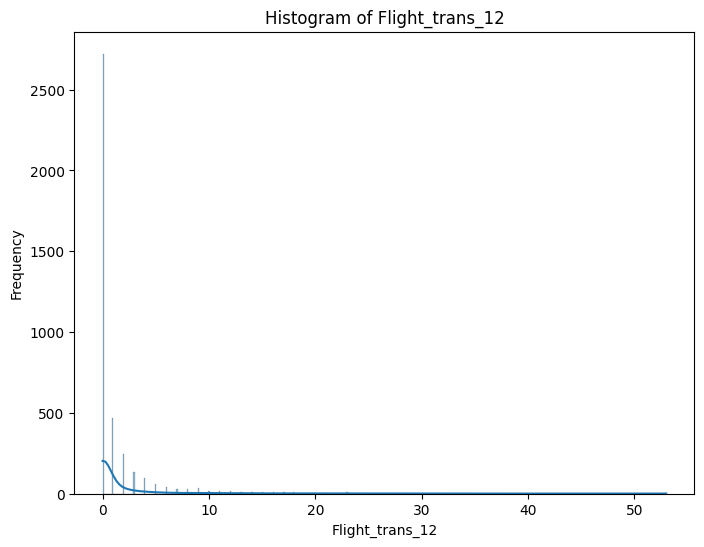

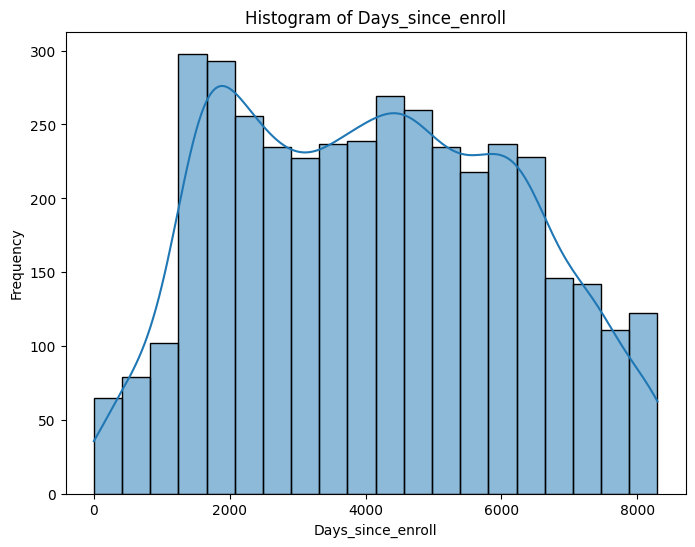

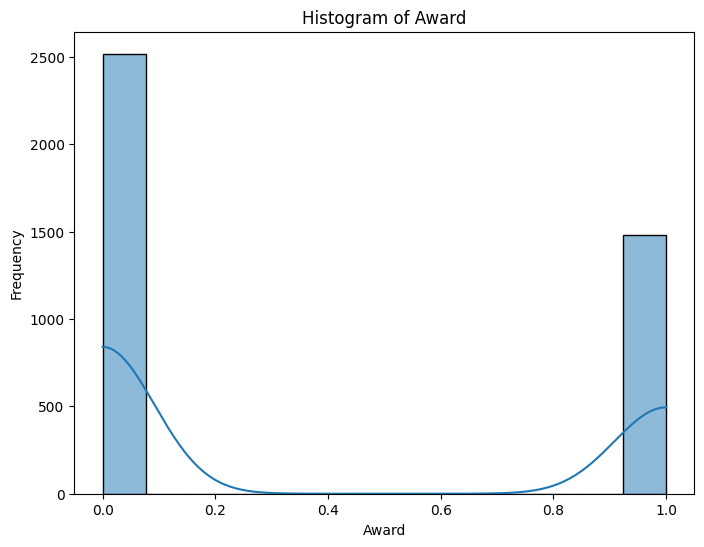

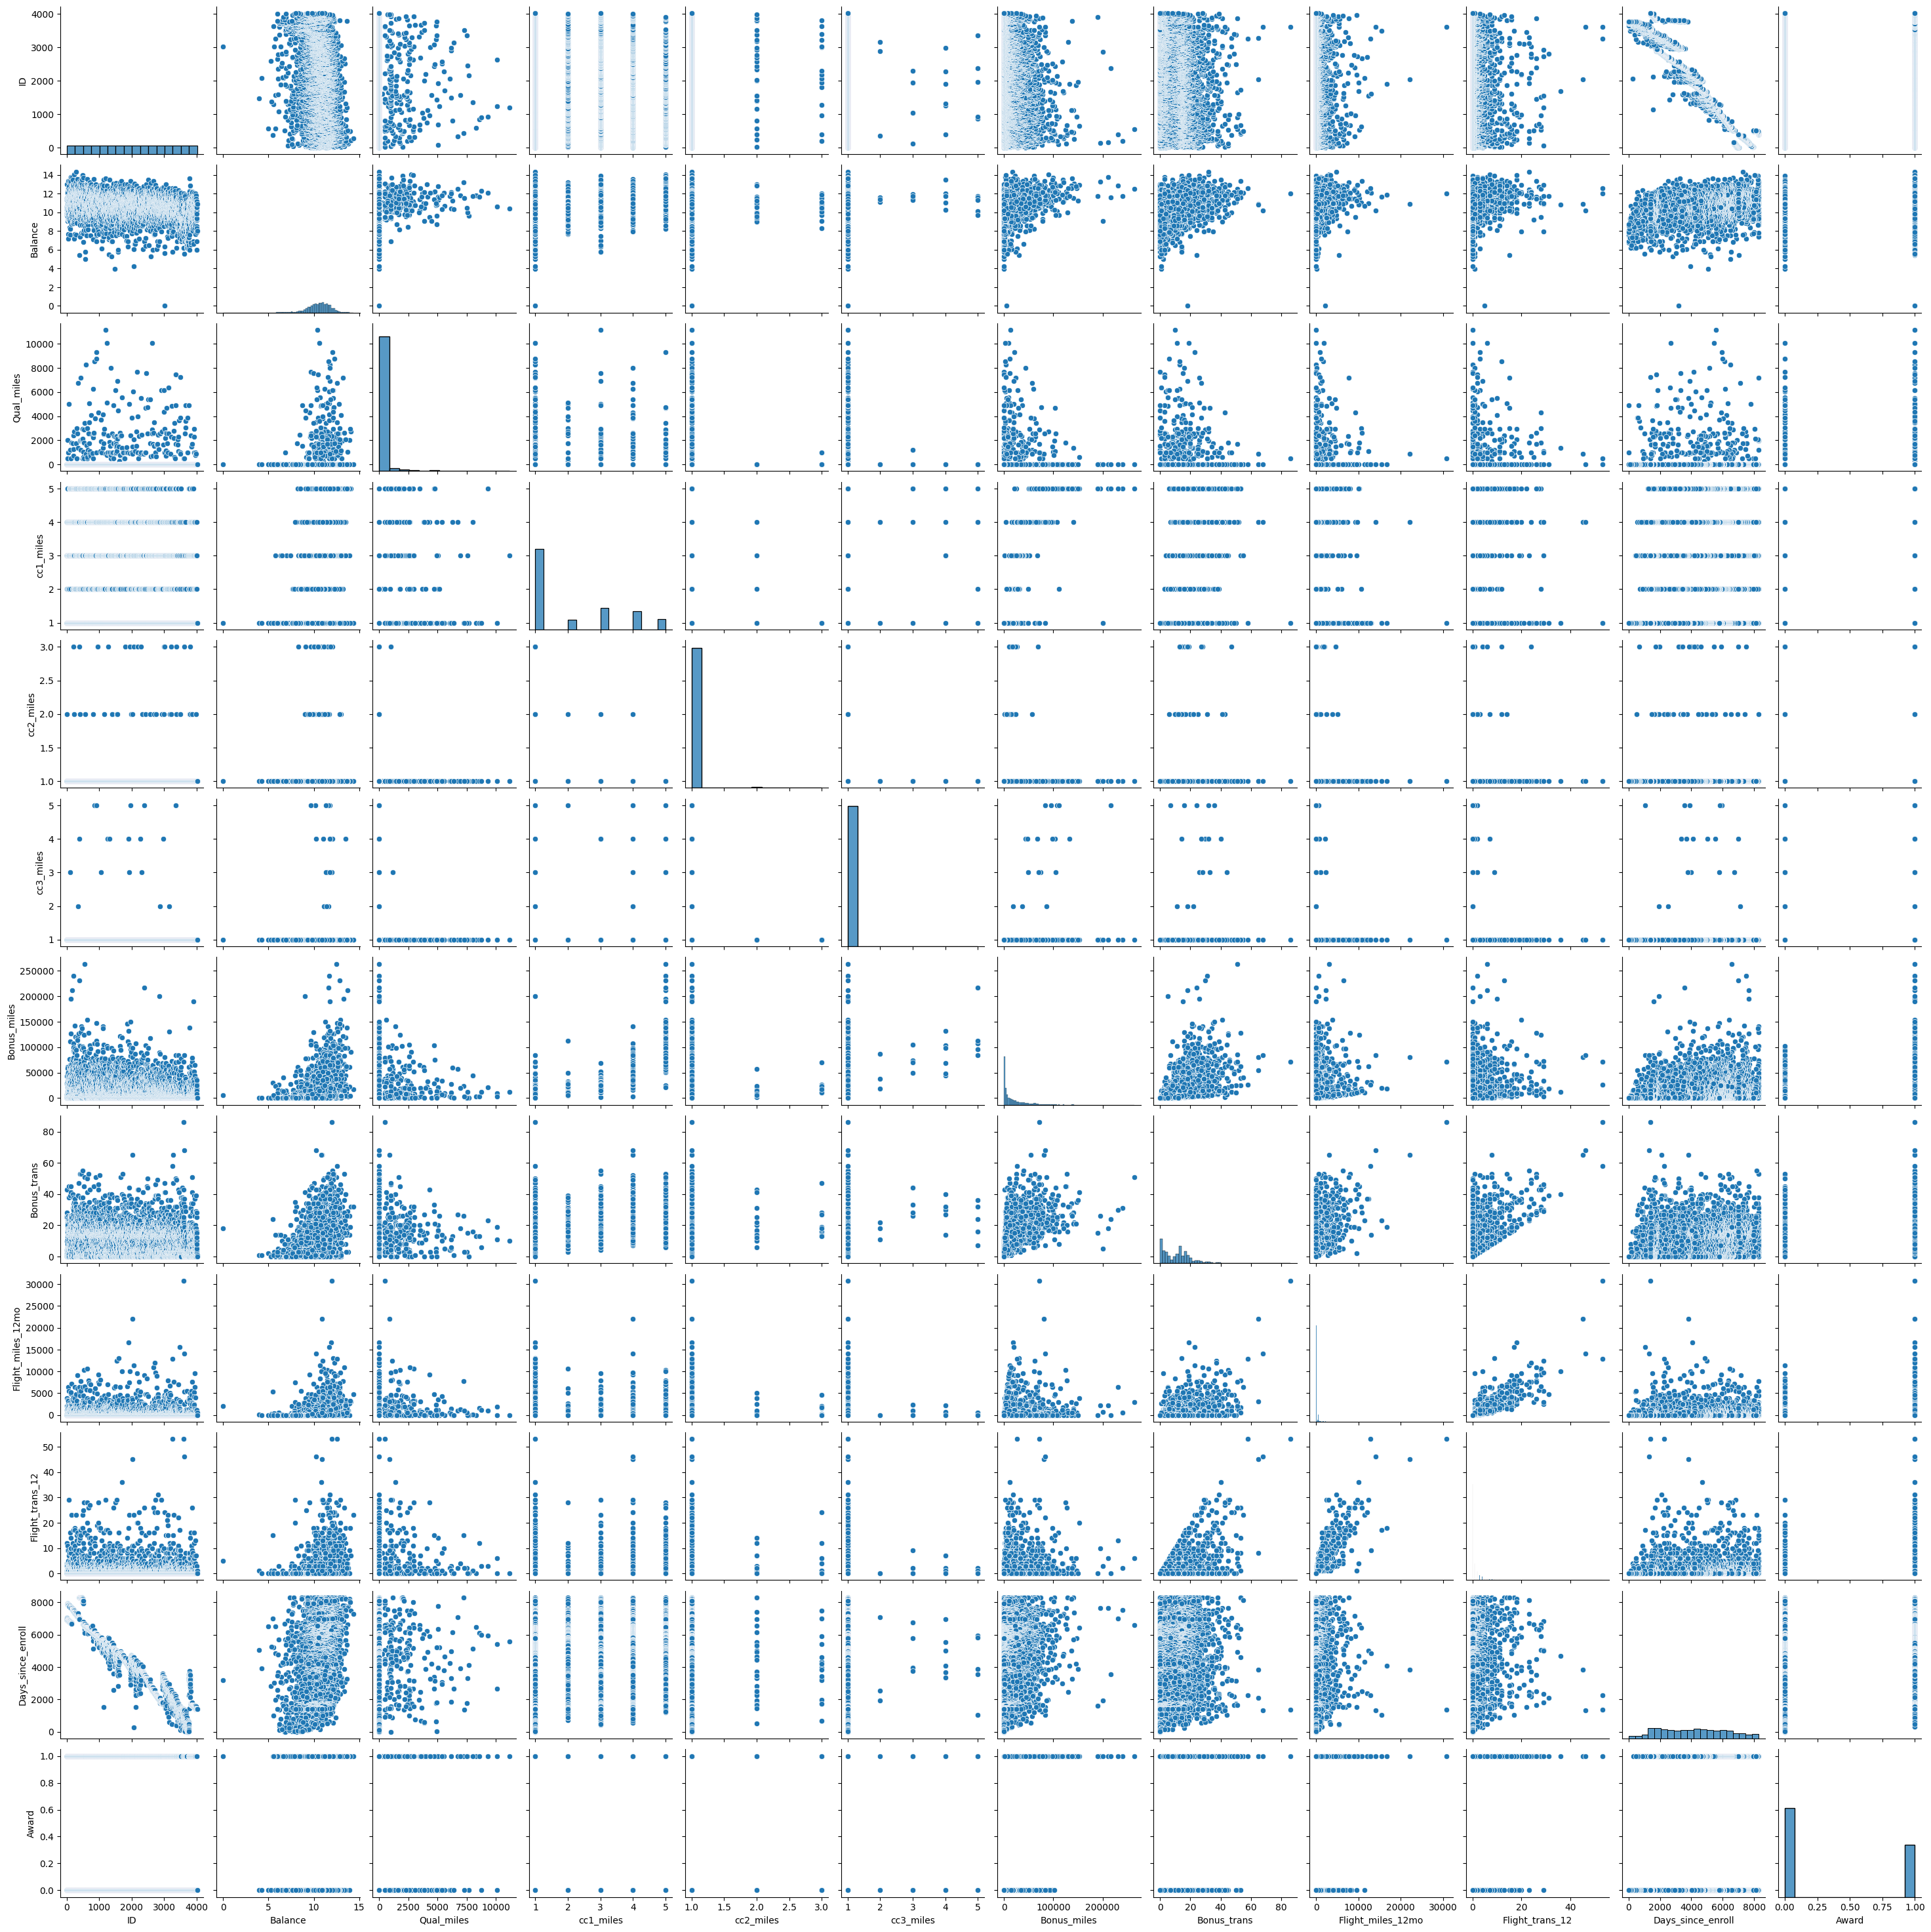

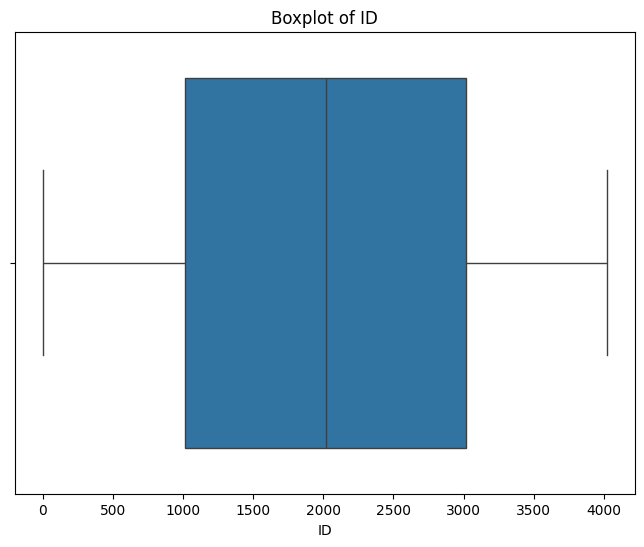

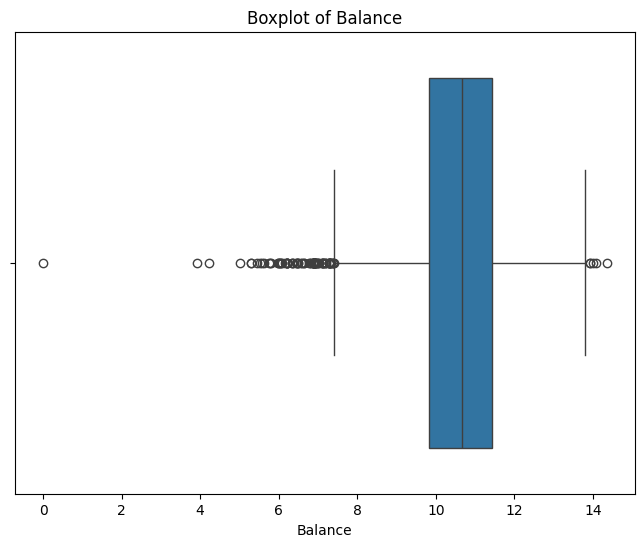

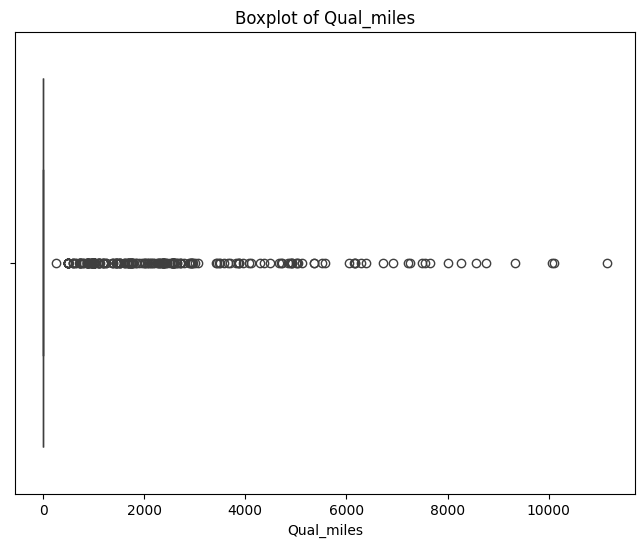

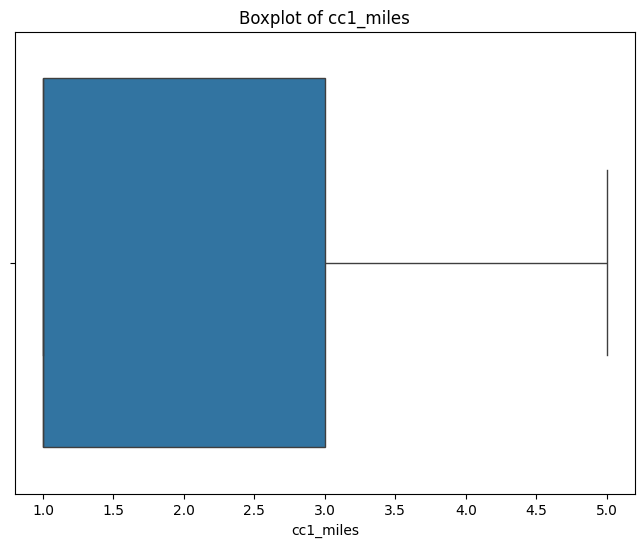

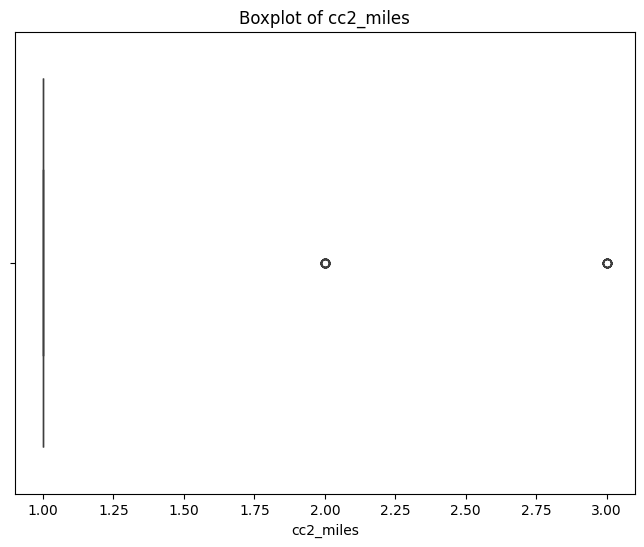

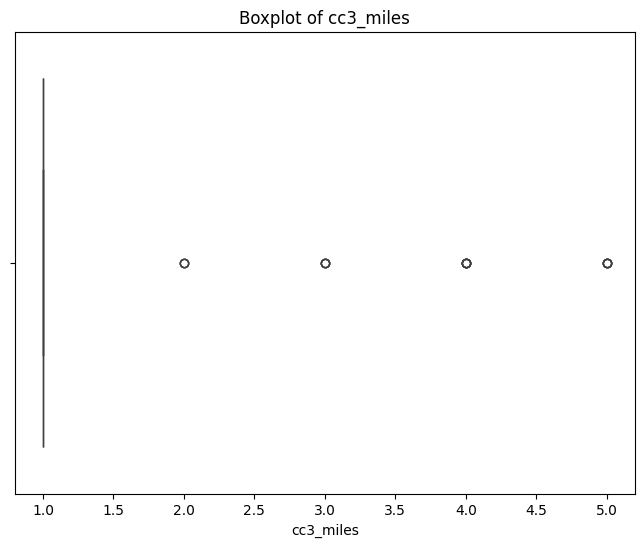

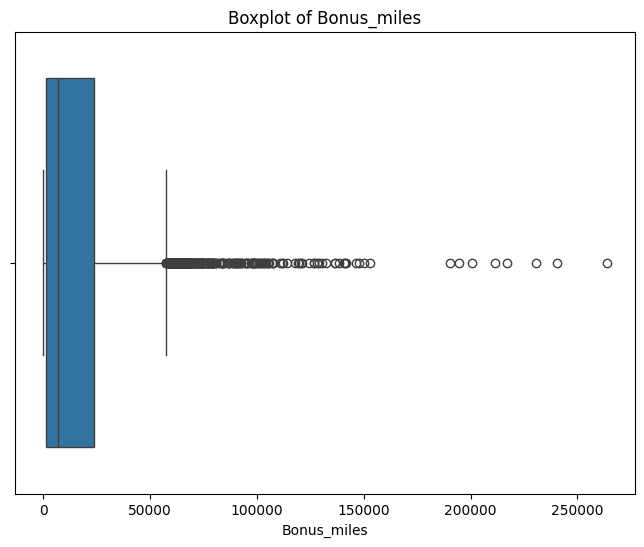

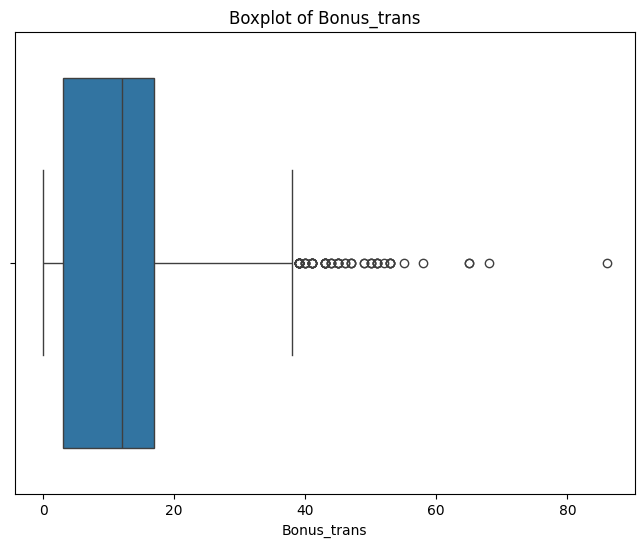

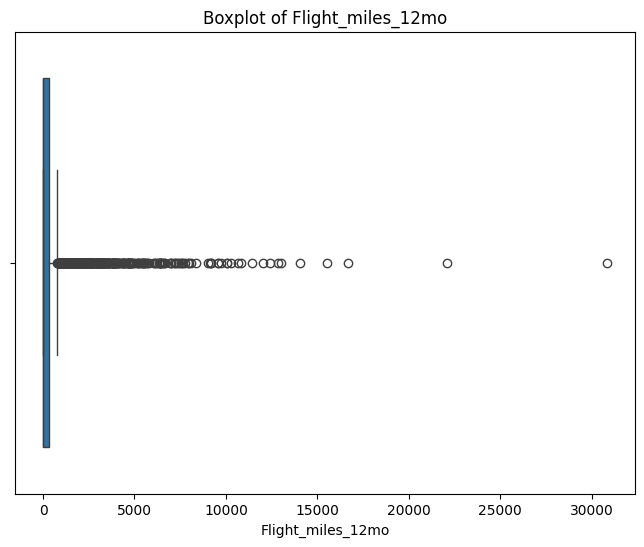

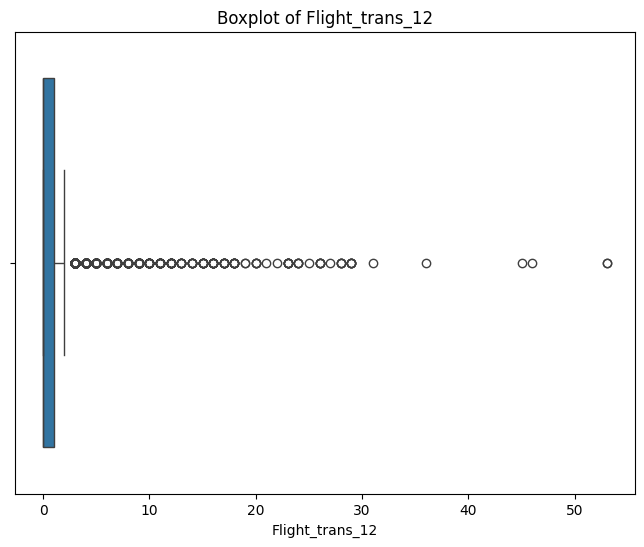

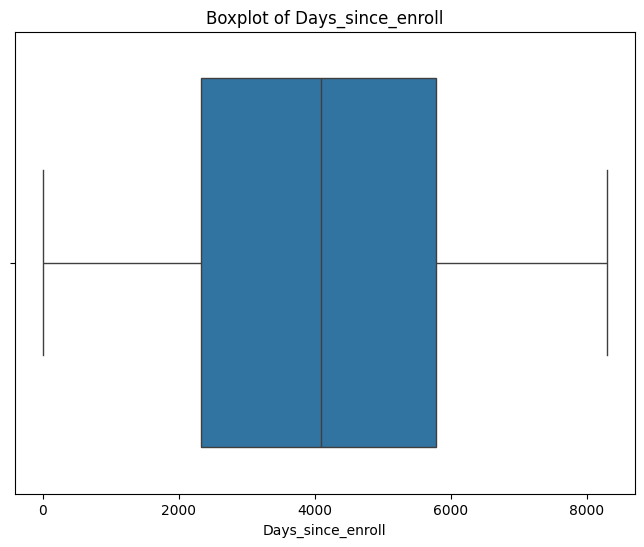

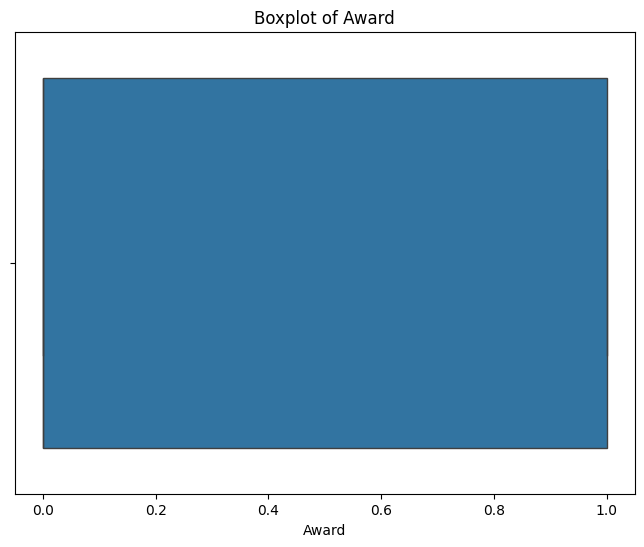

In [37]:
# Histograms for all columns
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Pairplot for pairwise relationships
sns.pairplot(df)
plt.show()

# Boxplots for all columns
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

In [38]:
#from the boxplot and histplot we can determine balance,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12 has outliers

In [39]:
# Identify outliers using IQR method for specific columns
cols_with_outliers = ['Balance', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12']

for col in cols_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the upper or lower bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


In [40]:
# fixing the outliers for the respective coloumns ans checking whether the outliers are still present by drawing boxplot

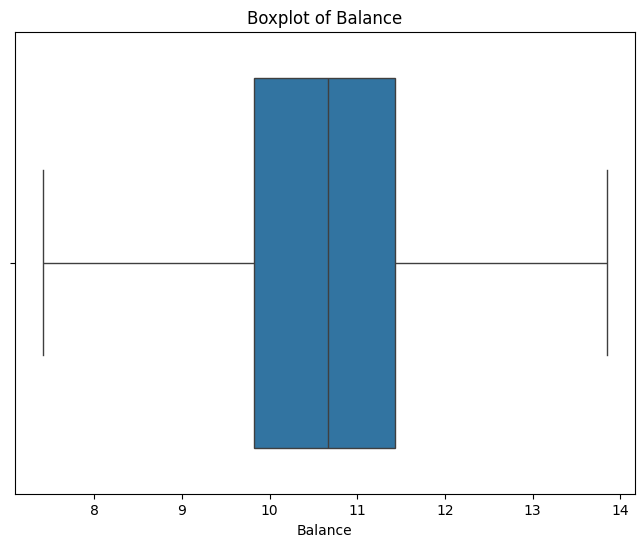

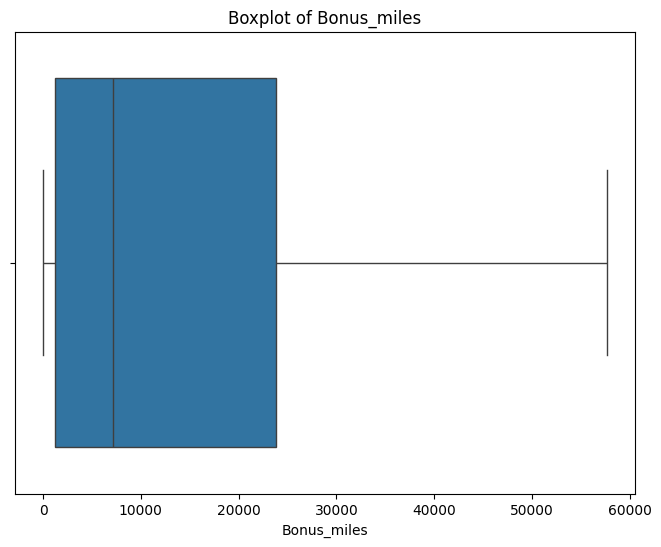

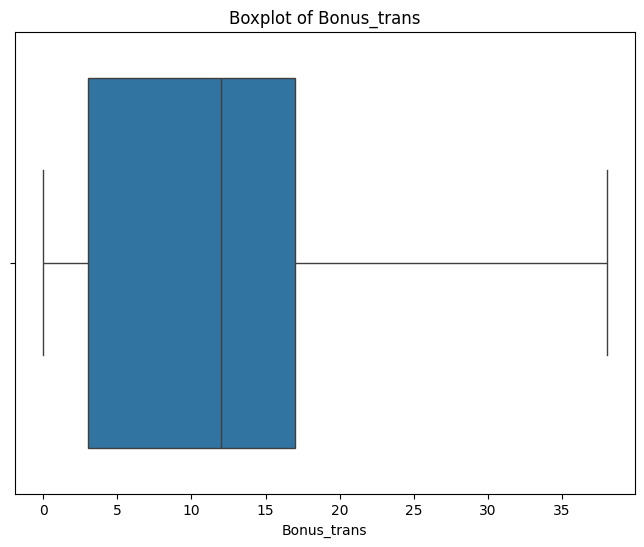

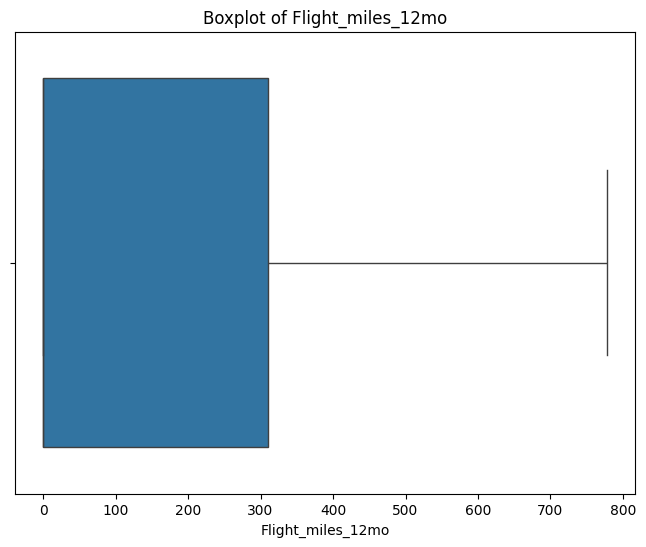

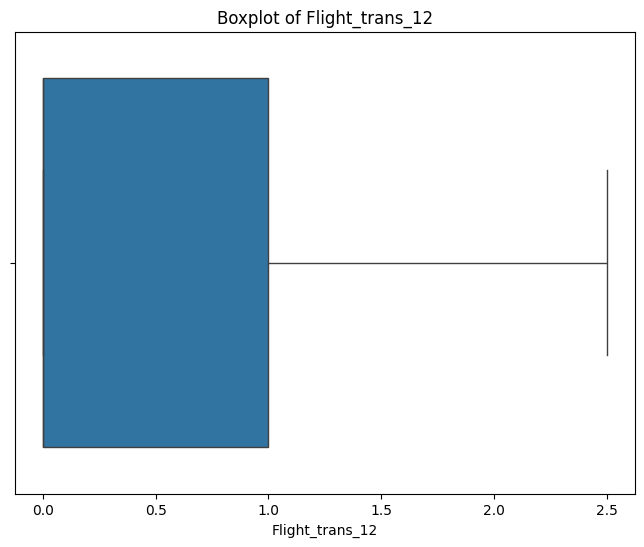

In [41]:
# Boxplots for specified columns
columns_to_plot = ['Balance', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12']
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [42]:
#finding if there are null values in coloumns
df.isnull().sum()

,0
ID,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


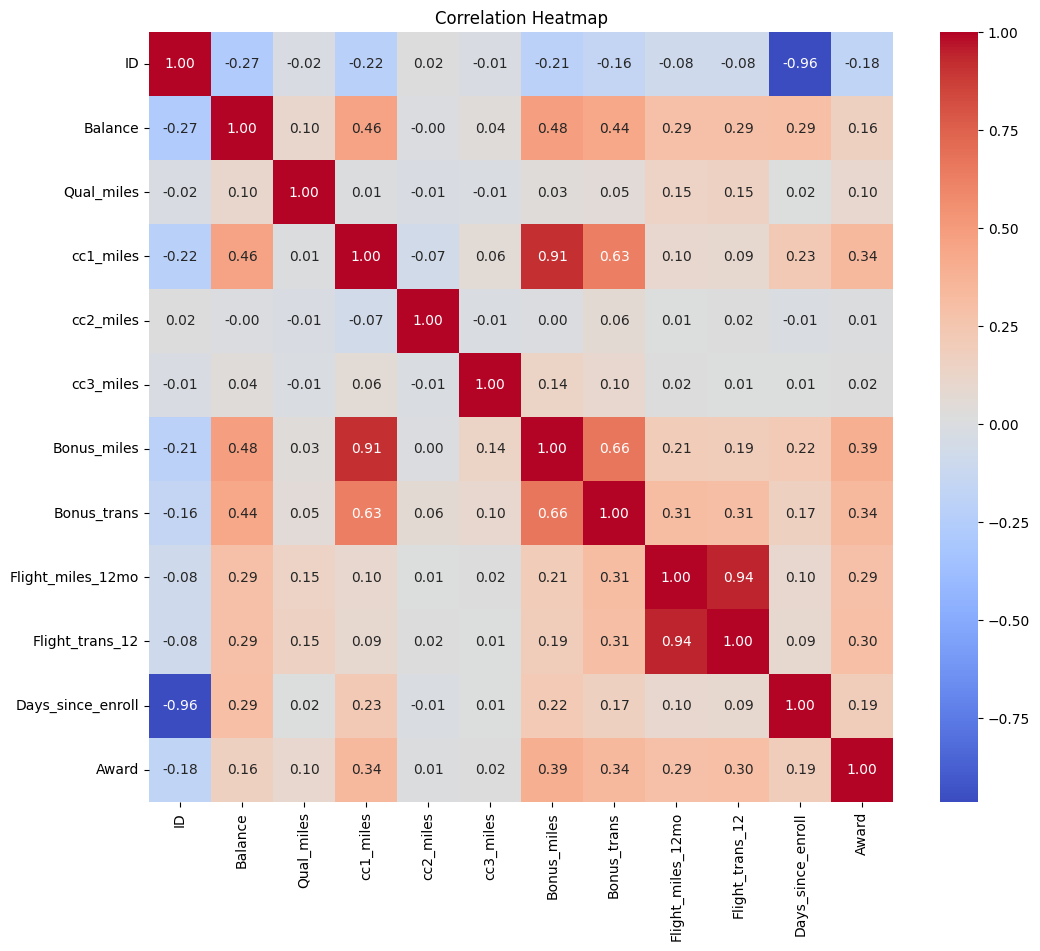

In [43]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [44]:
#from corelation matrix we can see filight miles 12mo and flight trans 12 has high correlation -0.94,

In [45]:
#droping the columns that dosen't contribute or unnecessary
df = df.drop(['Qual_miles', 'cc2_miles', 'cc3_miles', 'ID'], axis=1)

In [46]:
df.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,10.245089,1,174.0,1.0,0.0,0.0,7000,0
1,9.865007,1,215.0,2.0,0.0,0.0,6968,0
2,10.629949,1,4123.0,4.0,0.0,0.0,7034,0
3,9.600827,1,500.0,1.0,0.0,0.0,6952,0
4,11.490199,4,43300.0,26.0,777.5,2.5,6935,1


In [47]:
#scalinf /standardizing data so the all the data are in same units
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df.iloc[:,1:])
df_scaled

array([[-0.76957841, -0.8430905 , -1.1488544 , ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-0.76957841, -0.84082186, -1.03913266, ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-0.76957841, -0.6245814 , -0.81968917, ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 0.68312117,  0.55533457, -0.38080221, ..., -0.62614341,
        -1.31560393,  1.30391816],
       [-0.76957841, -0.82505202, -1.1488544 , ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [-0.76957841, -0.8527184 , -1.25857614, ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

In [48]:
#finding Kmeans for the above the data
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    if i > 4:
      break


In [49]:
wcss

[27993.000000000044,
 19217.1685928185,
 14654.09918646659,
 12232.688377715252,
 11469.226748512508]

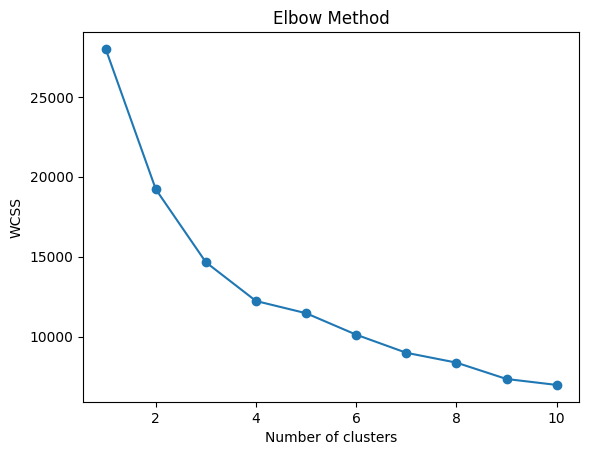

In [50]:
#using elbow graph to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

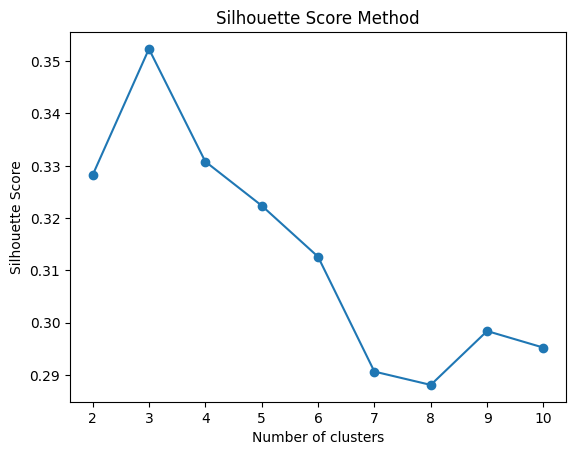

Optimal number of clusters based on Silhouette Score: 3


In [62]:
#using silhouette graph to find the optimal number of cluster more precisely
# Calculate silhouette scores for different cluster numbers
silhouette_scores = []
for n_clusters in range(2, 11):  # Test cluster numbers from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal number of clusters based on the highest silhouette score
optimal_n_clusters = np.argmax(silhouette_scores) + 2 # Add 2 because range starts from 2

print(f"Optimal number of clusters based on Silhouette Score: {optimal_n_clusters}")

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=0)
kmeans.fit(df_scaled)
df['cluster_labels'] = kmeans.labels_

In [67]:
# now optimal clusters for kmeans is 3 so using kmeans for 3 clusters
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [68]:
#giving cluster id for each cluster
clusters_new.labels_

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [69]:
df['clusterid_new'] = clusters_new.labels_

In [70]:
clusters_new.cluster_centers_

array([[-0.3055492 , -0.14045184,  0.23700174,  1.6988241 ,  1.68350343,
         0.070835  ,  0.42289155],
       [-0.54616143, -0.5762818 , -0.48515365, -0.53294129, -0.52775309,
        -0.19636659, -0.4386725 ],
       [ 1.38295674,  1.33145999,  0.87145908, -0.05281476, -0.0531555 ,
         0.37034392,  0.64148889]])

In [71]:
df.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_labels,clusterid_new,segment
0,10.245089,1,174.0,1.0,0.0,0.0,7000,0,0,1,1
1,9.865007,1,215.0,2.0,0.0,0.0,6968,0,0,1,1
2,10.629949,1,4123.0,4.0,0.0,0.0,7034,0,0,1,1
3,9.600827,1,500.0,1.0,0.0,0.0,6952,0,0,1,1
4,11.490199,4,43300.0,26.0,777.5,2.5,6935,1,2,0,0


In [72]:
StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:])

In [74]:
#segementation of each clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['segment'] = kmeans.fit_predict(scaled_data)

In [75]:
df['segment']

,segment
0,1
1,1
2,1
3,1
4,0
...,...
3994,1
3995,1
3996,2
3997,1


In [76]:
print("Segmented User Data:")
print(df)

Segmented User Data:
        Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0     10.245089          1        174.0          1.0                0.0   
1      9.865007          1        215.0          2.0                0.0   
2     10.629949          1       4123.0          4.0                0.0   
3      9.600827          1        500.0          1.0                0.0   
4     11.490199          4      43300.0         26.0              777.5   
...         ...        ...          ...          ...                ...   
3994   9.824282          1       8525.0          4.0              200.0   
3995  11.072651          1        981.0          5.0                0.0   
3996  11.206373          3      25447.0          8.0                0.0   
3997  10.913269          1        500.0          1.0              500.0   
3998   8.012018          1          0.0          0.0                0.0   

      Flight_trans_12  Days_since_enroll  Award  cluster_labels  \
0          

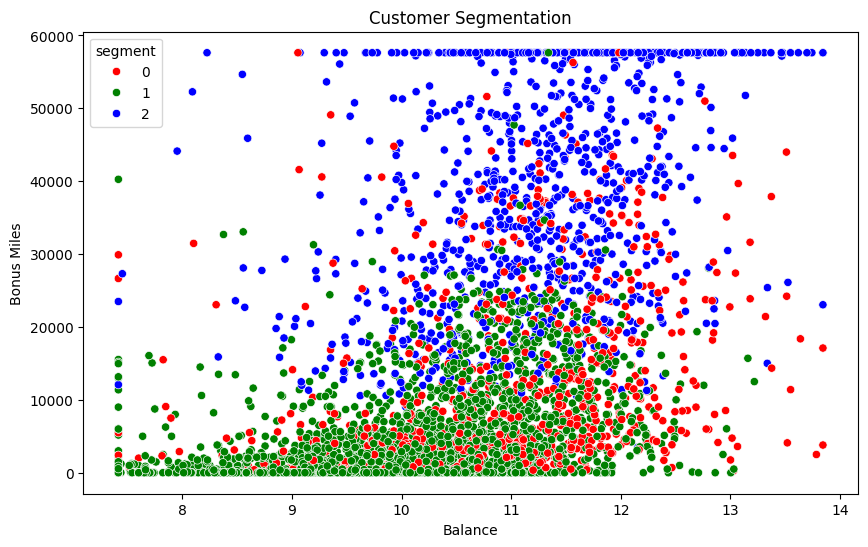

In [84]:
#scatterplot for coustmer segmentation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Balance', y='Bonus_miles', hue='segment', data=df, palette=['red', 'green', 'blue']) # Assign colors to segments
plt.title('Customer Segmentation')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.show()

In [86]:
#from the scatterplot we can see segment 2 has bonusmiles and balance compared to others
#segment 1 has lower balance and bonusmiles
#segment 0 has moderate balance and bonusmmiles
#so to conclude costumers can be segmentes to high spenders,low spenders, people intrested in promotions